# Datasets

Data [Bakery Sales] loaded successfully
   Transaction           Item         date_time period_day weekday_weekend
0            1          Bread   10/30/2016 9:58    morning         weekend
1            2   Scandinavian  10/30/2016 10:05    morning         weekend
2            2   Scandinavian  10/30/2016 10:05    morning         weekend
3            3  Hot chocolate  10/30/2016 10:07    morning         weekend
4            3            Jam  10/30/2016 10:07    morning         weekend
Data [Groceries-dataset] loaded successfully
Data [Market Basket] loaded successfully
   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE 

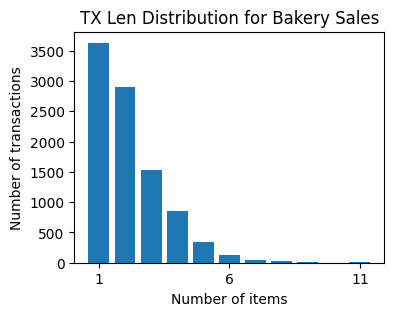

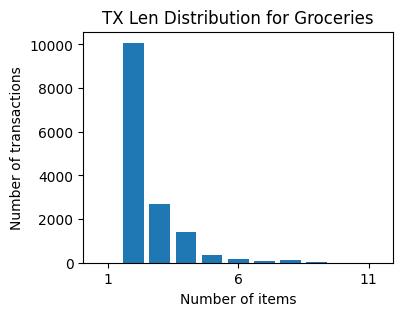

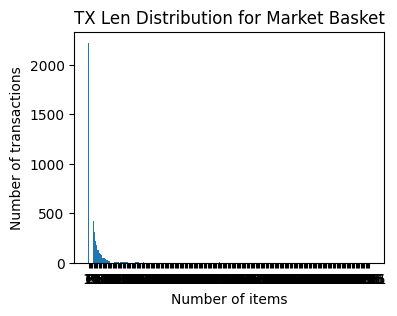

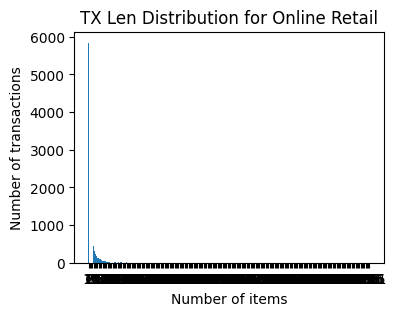

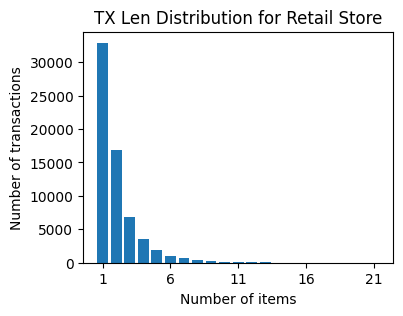

In [1]:
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display

import datasets.dummy_dataset.loader as dummy_dataset
import datasets.bakery_sales_dataset.loader as bakery_sales_dataset
# import datasets.cafe_dataset.loader as cafe_dataset # Bad dataset
import datasets.groceries_dataset.loader as groceries_dataset
import datasets.market_basket_dataset.loader as market_basket_dataset
import datasets.online_retail_dataset.loader as online_retail_dataset
import datasets.retail_store_sales_dataset.loader as retail_store_sales_dataset
from AssociationRuleMining.algorithms.evaluate import eval_params

all_datasets = [
    bakery_sales_dataset.std(), 
    groceries_dataset.std(), 
    market_basket_dataset.std(), 
    online_retail_dataset.std(), 
    retail_store_sales_dataset.std(),
]

for dataset in all_datasets:
    dataset.print_basics()

from AssociationRuleMining.algorithms.orange import orange
from algorithms.evaluate import evaluate

# Dummy Dataset

Number of transactions: 10000
Number of unique items: 100
Average transaction length: 7.66
Average items per unique item: 100.00
Max transaction length: 50
Min transaction length: 1
Graph of transaction length:


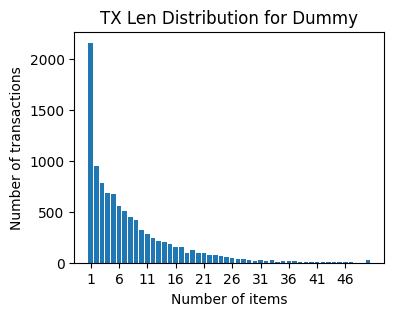

In [2]:
dummy_ds = dummy_dataset.gen(100, 10000, 50, 8)
dummy_ds.print_basics()

# Orange

Data [Market Basket] loaded successfully
   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price CustomerID         Country  
0  2,55      17850  United Kingdom  
1  3,39      17850  United Kingdom  
2  2,75      17850  United Kingdom  
3  3,39      17850  United Kingdom  
4  3,39      17850  United Kingdom  
Number of transactions: 20208
Number of unique items: 4185
Average transaction length: 25.76
Average items per unique item: 4.83
Max transaction length: 1114
Min transaction length: 1
Graph of transaction length:
Dataset saved to test1.json


[]

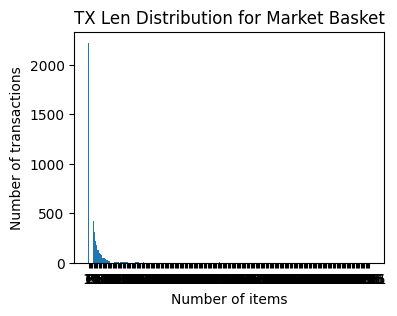

In [3]:
# Load the groceries dataset
# data = groceries_dataset.std()
data = market_basket_dataset.std()
data.print_basics()
# data.save("test1.json")
orange(data)

# data = data.resample_by_unique_items(20)
# data.print_basics()
# data.save("test2.json")
# orange(data)
# brute_force(data)

# Plot comparison

## 1. Fixed n_uniq_items, varying n_transactions
Using real datasets.

In [4]:
# Fixed n_uniq_items, varying n_transactions
fixed_n_uniq_items = 20
n_run_time = 10

# Create a progress bar for filtering datasets
filter_progress = IntProgress(min=0, max=len(all_datasets), description='', bar_style='')
filter_label = HTML(value="Filtering datasets: 0% (0/{})".format(len(all_datasets)))
display(VBox([filter_label, filter_progress]))

datasets = []
for i, dataset in enumerate(all_datasets):
    if len(dataset.unique_items) < fixed_n_uniq_items:
        continue
    new_ds = dataset.resample_by_unique_items(fixed_n_uniq_items)
    print(f"Dataset {new_ds.name}: {len(dataset.transactions)} transactions -> {len(new_ds.transactions)} transactions, {len(dataset.unique_items)} unique items -> {len(new_ds.unique_items)} unique items")
    datasets.append(new_ds)
    
    # Update the progress bar and display percentage
    filter_progress.value = i + 1
    percentage = int((i + 1) / len(all_datasets) * 100)
    filter_label.value = f"Filtering datasets: {percentage}% ({i + 1}/{len(all_datasets)})"

# evaluate(datasets)

Dataset Bakery Sales: 9465 transactions -> 26 transactions, 94 unique items -> 20 unique items
Dataset Groceries: 14963 transactions -> 21 transactions, 167 unique items -> 23 unique items
Dataset Market Basket: 20208 transactions -> 2 transactions, 4185 unique items -> 42 unique items
Dataset Online Retail: 25900 transactions -> 1 transactions, 4070 unique items -> 37 unique items
Dataset Retail Store: 64682 transactions -> 8 transactions, 5242 unique items -> 21 unique items


## 1. Fixed n_uniq_items, varying n_transactions
Using dummy datasets.

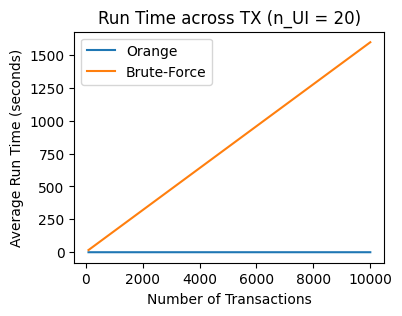

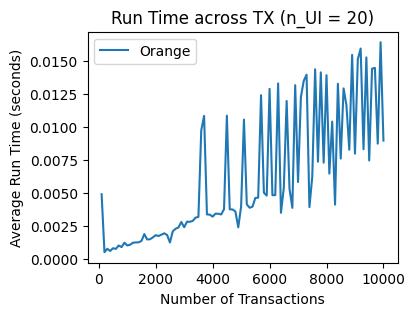

In [5]:
# Fixed n_uniq_items, varying n_transactions
fixed_n_uniq_items = 20
max_items_per_transaction = 15
n_transactions_min = 100
n_transactions_max = 10000
n_transactions_step = 100

datasets = []
for n_transactions in range(n_transactions_min, n_transactions_max + 1, n_transactions_step):
    new_ds = dummy_dataset.gen(fixed_n_uniq_items, n_transactions, max_items_per_transaction)
    datasets.append(new_ds)
    
evaluate(datasets, mode="transactions")
evaluate(datasets, mode="transactions", do_estimation=False)


## 2. Fixed n_transactions, varying n_uniq_items
Using dummy datasets.

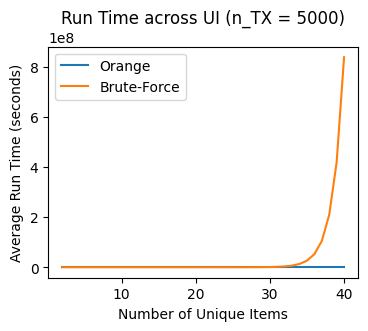

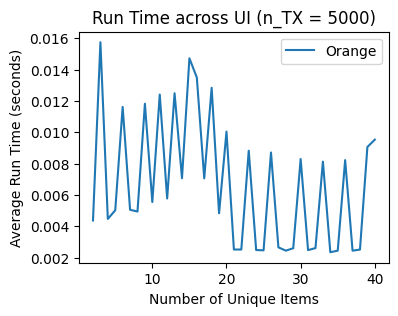

In [6]:
# Fixed n_uniq_items, varying n_transactions
fixed_transactions = 5000
n_uniq_items_min = 2
n_uniq_items_max = 40
n_uniq_items_step = 1

datasets = []
for n_uniq_items in range(n_uniq_items_min, n_uniq_items_max + 1, n_uniq_items_step):
    new_ds = dummy_dataset.gen(n_uniq_items, fixed_transactions, n_uniq_items)
    datasets.append(new_ds)
    
evaluate(datasets, mode="uniq_items")
evaluate(datasets, mode="uniq_items", do_estimation=False)

# Compare across parameters


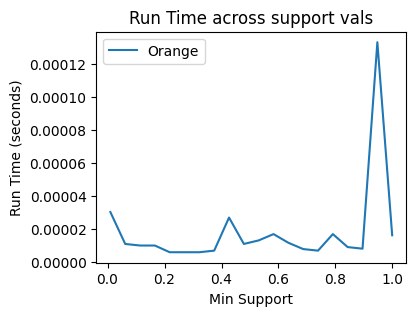

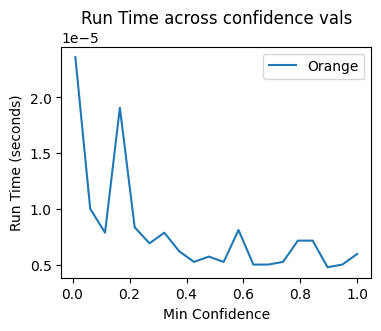

In [7]:
ds = dummy_dataset.gen(40, 1, 80)
eval_params(ds, 20, "support", 0.01, 0.999, 0.999)
eval_params(ds, 20, "confidence", 0.01, 0.999, 0.999)